# Nama: Laksmi Dyah Nurlita
# NIM: 21110023
# Kelas: S1SD02-A

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#Import data
data = pd.read_csv('data_pinjaman.csv')
data.head()

,Umur,Pemasukan,Keluarga,Edukasi,Hipotek,Pinjaman Pribadi,Rekening Efek,Sertifikat Deposito,Online,Kartu Kredit
0,35,81,3,2,104,0,0,0,1,0
1,34,180,1,3,0,1,0,0,0,0
2,38,130,4,3,134,1,0,0,0,0
3,46,193,2,3,0,1,0,0,0,0
4,56,25,4,2,111,0,0,0,1,0


In [5]:
#Dimensi data
data.shape

(960, 10)

Output: Terdiri dari 960 baris dan 10 kolom

In [6]:
#Informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Umur                 960 non-null    int64
 1   Pemasukan            960 non-null    int64
 2   Keluarga             960 non-null    int64
 3   Edukasi              960 non-null    int64
 4   Hipotek              960 non-null    int64
 5   Pinjaman Pribadi     960 non-null    int64
 6   Rekening Efek        960 non-null    int64
 7   Sertifikat Deposito  960 non-null    int64
 8   Online               960 non-null    int64
 9   Kartu Kredit         960 non-null    int64
dtypes: int64(10)
memory usage: 75.1 KB


Output: terdiri dari 960 baris dari index 0-959, memiliki total 10 kolom yg memiliki masing-masing data non-null. setiap kolom memiliki type data integer 64 bit

In [7]:
#Daskriptif statistik
data.describe()

,Umur,Pemasukan,Keluarga,Edukasi,Hipotek,Pinjaman Pribadi,Rekening Efek,Sertifikat Deposito,Online,Kartu Kredit
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,45.308333,105.629167,2.492708,2.058333,75.584375,0.500000,0.112500,0.164583,0.600000,0.286458
std,11.660059,53.940530,1.154376,0.812271,132.366844,0.500261,0.316145,0.370997,0.490153,0.452342
min,23.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,111.000000,3.000000,2.000000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,152.250000,4.000000,3.000000,118.250000,1.000000,0.000000,0.000000,1.000000,1.000000
max,66.000000,203.000000,4.000000,3.000000,617.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Ubah kolom 'Pinjaman Pribadi" menjadi kolom paling kanan

#Menghapus data
a = data.pop('Pinjaman Pribadi')

#Insert data ke sebelah paling kanan
data.insert(len(data.columns), 'Pinjaman Pribadi', a)

data.head()

,Umur,Pemasukan,Keluarga,Edukasi,Hipotek,Rekening Efek,Sertifikat Deposito,Online,Kartu Kredit,Pinjaman Pribadi
0,35,81,3,2,104,0,0,1,0,0
1,34,180,1,3,0,0,0,0,0,1
2,38,130,4,3,134,0,0,0,0,1
3,46,193,2,3,0,0,0,0,0,1
4,56,25,4,2,111,0,0,1,0,0


In [9]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

output: Dalam memprediksi apakah seseorang memiliki pinjaman pribadi atau tidak
> Variabel x: Umur, Pemasukan, Keluarga, Edukasi, Hipotek, Rekening Efek, Sertifikat Deposito, Online, Kartu kredit
> variabel y: Pinjaman Online

In [39]:
#Memisahkan data menjadi train dan test
from sklearn.model_selection import train_test_split

#Masukkan ukuran test sebesar 25% dan random state 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [40]:
from sklearn.preprocessing import StandardScaler

#Scaling input data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

**Bernoulli**

In [13]:
from sklearn.naive_bayes import BernoulliNB

#Buat objek classifier
classifier_bern = BernoulliNB()

#Training model
classifier_bern.fit(x_train, y_train)

#Testing model
y_pred_bern = classifier_bern.predict(x_test)

Output: sudah melatih model dgn data x_train dan y_train. Kemudian, memprediksi data x_test menggunakan model tersebut. Hasil disimpan dalam variabel y_pred_bern

Akurasi Bernoulli

In [14]:
from sklearn.metrics import accuracy_score

#Print akurasi model
print(accuracy_score(y_pred_bern, y_test))

0.875


Output: Akurasi model dgn membandingkan hasil prediksi dengan hasil sesungguhnya dan mendapatkan nilai 0,875 atau 87,5%, yang berarti model dapat memprediksi 87,5% data secara akurat.

Evaluasi Bernoulli

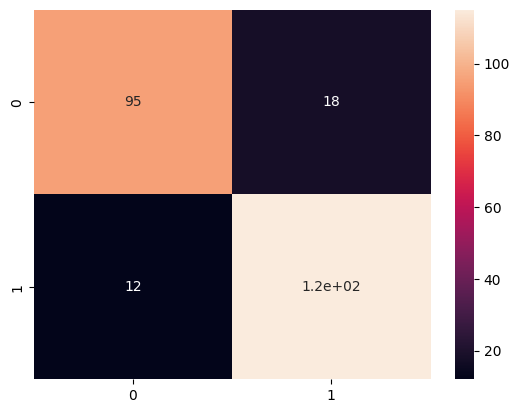

In [15]:
from sklearn.metrics import confusion_matrix

#Membandingkan data test dan data prediksi
cm = confusion_matrix(y_test, y_pred_bern)

#Nilai data di setiap bagian matriks
sns.heatmap(cm, annot = True)
plt.savefig('Confusion_bern.png')

Output: Pada baris pertama kolom pertama terdapat 95 label '0' yang diprediksi dengan benar, pada baris pertama kolom kedua terdapat 18 label'0' yang diprediksi sebagai label '1', sehingga diprediksi dengan salah. Pada baris pertama kolom kedua terdapat 12 label '1' yang diprediksi dengan benar, pada baris pertama kolom kedua terdapat 1.2e+02 label '1' yang diprediksi dengan benar.

In [16]:
from sklearn.metrics import classification_report

#Tampilkan classification report bernoulli
print(classification_report(y_test, y_pred_bern))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       113
           1       0.86      0.91      0.88       127

    accuracy                           0.88       240
   macro avg       0.88      0.87      0.87       240
weighted avg       0.88      0.88      0.87       240



**Gaussian**

In [17]:
from sklearn.naive_bayes import GaussianNB

#Buat objek classifier
classifier_gaus = GaussianNB()

#Training model
classifier_gaus.fit(x_train, y_train)

#Testing model
y_pred_gaus = classifier_gaus.predict(x_test)

Output: sudah melatih model dgn data x_train dan y_train. Kemudian, memprediksi data x_test menggunakan model tersebut. Hasil disimpan dalam variabel y_pred_gaus

Akurasi Gaussian

In [18]:
#Print akurasi model
print(accuracy_score(y_test, y_pred_gaus))

0.8625


Output: Akurasi model dgn membandingkan hasil prediksi dengan hasil sesungguhnya dan mendapatkan nilai 0,8625 atau 86,25%, yang berarti model dapat memprediksi 86,25% data secara akurat.

Evaluasi Gaussian

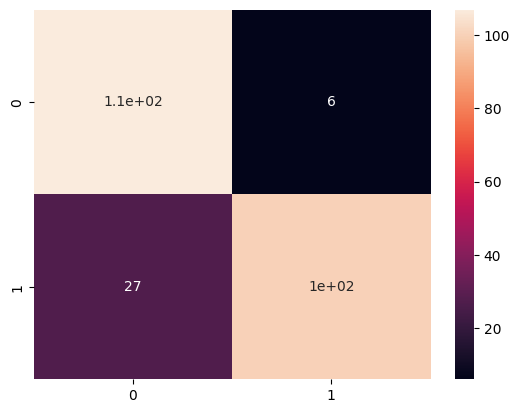

In [19]:
#Membandingkan data test dan data prediksi
cm = confusion_matrix(y_test, y_pred_gaus)

#Nilai data di setiap bagian matriks
sns.heatmap(cm, annot = True)
plt.savefig('Confusion_gaus.png')

Output: Pada baris pertama kolom pertama terdapat 1.1e+02 label '0' yang diprediksi dengan benar, pada baris pertama kolom kedua terdapat 6 label'0' yang diprediksi sebagai label '1', sehingga diprediksi dengan salah. Pada baris pertama kolom kedua terdapat 27 label '1' yang diprediksi dengan benar, pada baris pertama kolom kedua terdapat 1e+02 label'1' yang diprediksi dengan benar.

In [20]:
#Tampilkan classification report gausian
print(classification_report(y_test, y_pred_gaus))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       113
           1       0.94      0.79      0.86       127

    accuracy                           0.86       240
   macro avg       0.87      0.87      0.86       240
weighted avg       0.88      0.86      0.86       240



**Multinomial**

In [25]:
#Memisahkan data menjadi train dan test
from sklearn.model_selection import train_test_split

#Masukkan ukuran test sebesar 20% dan random state 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [26]:
#Buat model
from sklearn.naive_bayes import MultinomialNB

model = GaussianNB()

#Melatih model
model.fit(x_train, y_train)

#Testing model
y_pred_multi = model.predict(x_test)

Akurasi Multinomial

In [27]:
print(accuracy_score(y_test, y_pred_multi))

0.8541666666666666


Output: Akurasi model dgn membandingkan hasil prediksi dengan hasil sesungguhnya dan mendapatkan nilai 0,854 atau 85,4%, yang berarti model dapat memprediksi 85,4% data secara akurat.

Evaluasi Multinomial

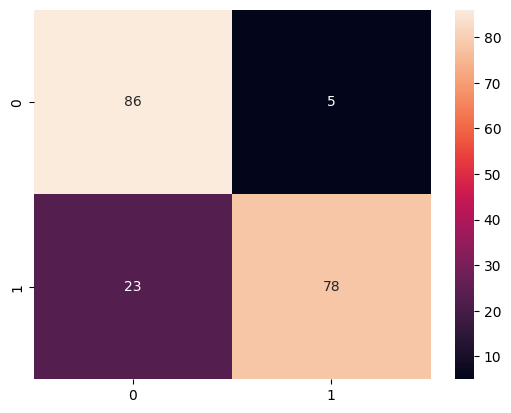

In [28]:
#Membandingkan data test dan data prediksi
cm = confusion_matrix(y_test, y_pred_multi)

#Nilai data di setiap bagian matriks
sns.heatmap(cm, annot = True)
plt.savefig('Confusion_multi.png')

Output: Pada baris pertama kolom pertama terdapat 86 label '0' yang diprediksi dengan benar, pada baris pertama kolom kedua terdapat 5 label'0' yang diprediksi sebagai label '1', sehingga diprediksi dengan salah. Pada baris pertama kolom kedua terdapat 23 label '1' yang diprediksi dengan benar, pada baris pertama kolom kedua terdapat 78 label '1' yang diprediksi dengan benar.

In [29]:
#Tampilkan classification report multinomial
print(classification_report(y_test, y_pred_multi))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        91
           1       0.94      0.77      0.85       101

    accuracy                           0.85       192
   macro avg       0.86      0.86      0.85       192
weighted avg       0.87      0.85      0.85       192



**Prediksi**
> Memprediksi data acak
> Seseorang dengan kriteria: Umur, Pemasukan, Keluarga, Edukasi, Hipotek, Rekening Efek, Sertifikat Deposito, Online, dan Kartu Kredit

> Model memprediksi 1 : Orang Tersebut memiliki pinjaman pribadi
> Model memprediksi 0 : Orang tersebut tidak memiliki pinjaman pribadi

In [41]:
#Data untuk prediksi
b = np.array([[45, 100, 3, 4, 80, 0, 0, 1, 1],
              [50, 90, 4, 5, 100, 1, 1, 0, 1],
              [60, 110, 4, 3, 90, 1, 0, 1, 0]])

c = sc_x.transform(b)

In [45]:
bern = classifier_bern.predict(c)
print(f'Hasil Prediksi Bernoulli : {bern}')
print('\n0 : Tidak Memiliki pinjaman Pribadi\n1 : Memiliki Pinjaman Pribadi')

Hasil Prediksi Bernoulli : [0 1 1]

0 : Tidak Memiliki pinjaman Pribadi
1 : Memiliki Pinjaman Pribadi


In [47]:
gaus = classifier_gaus.predict(c)
print(f'Hasil Prediksi Gausian : {gaus}')
print('\n0 : Tidak Memiliki pinjaman Pribadi\n1 : Memiliki Pinjaman Pribadi')

Hasil Prediksi Gausian : [0 1 1]

0 : Tidak Memiliki pinjaman Pribadi
1 : Memiliki Pinjaman Pribadi


In [48]:
multi = model.predict(c)
print(f'Hasil Prediksi Multinomial : {multi}')
print('\n0 : Tidak Memiliki pinjaman Pribadi\n1 : Memiliki Pinjaman Pribadi')

Hasil Prediksi Multinomial : [0 1 0]

0 : Tidak Memiliki pinjaman Pribadi
1 : Memiliki Pinjaman Pribadi
